<a href="https://www.kaggle.com/code/kamtoeze/bellabeat-case-study?scriptVersionId=101582075" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Summary of business task**

Bellabeat is a high-tech company that manufactures health-focused smart products. As a junior data analyst at the bellabeat company. The company founder and chief creative officer Sršen asked me to analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart
devices. She also wants me to select one Bellabeat product to apply these insights to in my presentation.

These are the products from the bellabeat company:

○ Bellabeat app: The Bellabeat app provides users with health data related to their activity, sleep, stress,
menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and
make healthy decisions. The Bellabeat app connects to their line of smart wellness products.

○ Leaf: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects
to the Bellabeat app to track activity, sleep, and stress.

○ Time: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user
activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your
daily wellness.

○ Spring: This is a water bottle that tracks daily water intake using smart technology to ensure that you are
appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your
hydration levels.

○ Bellabeat membership: Bellabeat also offers a subscription-based membership program for users.
Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and
beauty, and mindfulness based on their lifestyle and goals

**About the Data**

Data source: i got the data from https://www.kaggle.com/datasets/arashnic/fitbit 
Data tools used: I used python for the data cleaning process, analysis and data visualization
How was the data stored? The data files were stored in a zip folder in a csv file format. The data was stored in a long format.


**Limitations of the Data**

* The data doesn’t specify age of the participants.
* Menstrual cycle data isn’t included.
* The calories column doesn’t specify if the calories are consumed or burned.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
activity_data = pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

In [3]:
sleep_data = pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

**Data Exploration Process:**

After we have loaded the needed datasets into the notebook. i will now preview and explore the data.

In [4]:
activity_data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
activity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [6]:
activity_data.shape

(940, 15)

In [7]:
activity_data["Id"].nunique()

33

In [8]:
activity_data.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [9]:
sleep_data.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [10]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [11]:
sleep_data.shape

(413, 5)

In [12]:
sleep_data['Id'].nunique()

24

In [13]:
sleep_data.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

**Findings**

from the data exploration conducted on the activity dataset. we can see there are 15 columns and 940 entries. we can also see there 33 unique Ids which means there are 33 women who logged their data.

after exploring the sleep dataset, we can see there are 5 columns and 413 entries, also important to note is that there are 24 unique ids which means only 24 women logged in their sleep data.

**Data Cleaning**

in the data cleaning stage, we will check for null values or incorrectly inputed data

In [14]:
activity_data.isnull()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
936,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
937,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
938,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
activity_data.isnull().values.any()

False

In [16]:
sleep_data.isnull()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
408,False,False,False,False,False
409,False,False,False,False,False
410,False,False,False,False,False
411,False,False,False,False,False


In [17]:
sleep_data.isnull().values.any()

False

In [18]:
activity_data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [19]:
del activity_data["LoggedActivitiesDistance"]

In [20]:
activity_data = activity_data.drop(columns = ["TrackerDistance"])

**findings**

* We can see that they are no null values in the datasets.
* I also dropped two columns from the activity data because one of them was repetitive and the other had just zeros as values. 
* i also noticed the dates columns are in object datatype. so in the data manipulation stage we will try and change that.

**Data Manipulation**

In [21]:
activity_data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [22]:
activity_data['ActivityDate'] = pd.to_datetime(activity_data['ActivityDate'])

In [23]:
activity_data['Daysoftheweek'] = pd.to_datetime(activity_data['ActivityDate']).dt.day_name()

In [24]:
activity_data['TotalActiveMinutes'] = activity_data['VeryActiveMinutes']+activity_data['FairlyActiveMinutes']+activity_data['LightlyActiveMinutes']

In [25]:
activity_data['TotalMinutes'] = activity_data['VeryActiveMinutes']+activity_data['FairlyActiveMinutes']+activity_data['LightlyActiveMinutes']+activity_data['SedentaryMinutes']

In [26]:
activity_data['Activehours'] = activity_data['TotalActiveMinutes']/60

In [27]:
activity_data['Totalhours'] = (activity_data['TotalMinutes']/60)

In [28]:
activity_data['Activehours'] =  activity_data['Activehours'].astype(int)

In [29]:
activity_data['Totalhours'] = activity_data['Totalhours'].astype(int)

In [30]:
activity_data['Sedentaryhours'] = (activity_data['SedentaryMinutes']/60)

In [31]:
activity_data['Sedentaryhours']= activity_data['Sedentaryhours'].astype(int)

In [32]:
new_columns = ["Id","ActivityDate","Daysoftheweek","TotalSteps","Calories","TotalDistance","VeryActiveDistance","ModeratelyActiveDistance","LightActiveDistance","SedentaryActiveDistance","VeryActiveMinutes","FairlyActiveMinutes","LightlyActiveMinutes","TotalActiveMinutes","SedentaryMinutes","TotalMinutes","Activehours","Sedentaryhours","Totalhours"]

In [33]:
activity_data = activity_data.reindex(columns = new_columns)

In [34]:
activity_data

,Id,ActivityDate,Daysoftheweek,TotalSteps,Calories,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,TotalActiveMinutes,SedentaryMinutes,TotalMinutes,Activehours,Sedentaryhours,Totalhours
0,1503960366,2016-04-12,Tuesday,13162,1985,8.500000,1.88,0.55,6.06,0.00,25,13,328,366,728,1094,6,12,18
1,1503960366,2016-04-13,Wednesday,10735,1797,6.970000,1.57,0.69,4.71,0.00,21,19,217,257,776,1033,4,12,17
2,1503960366,2016-04-14,Thursday,10460,1776,6.740000,2.44,0.40,3.91,0.00,30,11,181,222,1218,1440,3,20,24
3,1503960366,2016-04-15,Friday,9762,1745,6.280000,2.14,1.26,2.83,0.00,29,34,209,272,726,998,4,12,16
4,1503960366,2016-04-16,Saturday,12669,1863,8.160000,2.71,0.41,5.04,0.00,36,10,221,267,773,1040,4,12,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,Sunday,10686,2847,8.110000,1.08,0.20,6.80,0.00,17,4,245,266,1174,1440,4,19,24
936,8877689391,2016-05-09,Monday,20226,3710,18.250000,11.10,0.80,6.24,0.05,73,19,217,309,1131,1440,5,18,24
937,8877689391,2016-05-10,Tuesday,10733,2832,8.150000,1.35,0.46,6.28,0.00,18,11,224,253,1187,1440,4,19,24
938,8877689391,2016-05-11,Wednesday,21420,3832,19.559999,13.22,0.41,5.89,0.00,88,12,213,313,1127,1440,5,18,24


In [35]:
sleep_data.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [36]:
sleep_data['SleepDay']=pd.to_datetime(sleep_data['SleepDay'])

In [37]:
sleep_data['Dayoftheweek']=pd.to_datetime(sleep_data['SleepDay']).dt.day_name()

In [38]:
sleep_data['Hoursasleep'] = sleep_data['TotalMinutesAsleep']/60

In [39]:
sleep_data['Hoursasleep'] = sleep_data['Hoursasleep'].astype(int)

In [40]:
sleep_data

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Dayoftheweek,Hoursasleep
0,1503960366,2016-04-12,1,327,346,Tuesday,5
1,1503960366,2016-04-13,2,384,407,Wednesday,6
2,1503960366,2016-04-15,1,412,442,Friday,6
3,1503960366,2016-04-16,2,340,367,Saturday,5
4,1503960366,2016-04-17,1,700,712,Sunday,11
...,...,...,...,...,...,...,...
408,8792009665,2016-04-30,1,343,360,Saturday,5
409,8792009665,2016-05-01,1,503,527,Sunday,8
410,8792009665,2016-05-02,1,415,423,Monday,6
411,8792009665,2016-05-03,1,516,545,Tuesday,8


**Actions taken**

* During the data manipulation stage. i created new columns in the activity dataset to help us understand our analysis even better. i also changed datatypes of some of the columns.

* the same actions were applied to the sleep dataset, i created a new column and i changed the datatypes of some of the columns.this process will enable us understand the insights shown better.

**Data Analysis**

Now it is time for the data analysis process. i will conduct some statistical analysis to help me gain better understanding of the data

In [41]:
activity_data.describe()

,Id,TotalSteps,Calories,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,TotalActiveMinutes,SedentaryMinutes,TotalMinutes,Activehours,Sedentaryhours,Totalhours
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,2303.609574,5.489702,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,227.542553,991.210638,1218.753191,3.357447,16.059574,20.067021
std,2.424805e+09,5087.150742,718.166862,3.924606,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,121.776307,301.267437,265.931767,1.956366,5.081305,4.646936
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,1828.500000,2.620000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,146.750000,729.750000,989.750000,2.000000,12.000000,16.000000
50%,4.445115e+09,7405.500000,2134.000000,5.245000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,247.000000,1057.500000,1440.000000,4.000000,17.000000,24.000000
75%,6.962181e+09,10727.000000,2793.250000,7.712500,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,317.250000,1229.500000,1440.000000,5.000000,20.000000,24.000000
max,8.877689e+09,36019.000000,4900.000000,28.030001,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,552.000000,1440.000000,1440.000000,9.000000,24.000000,24.000000


In [42]:
sleep_data.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Hoursasleep
count,4.130000e+02,413.000000,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225,6.481840
std,2.060360e+09,0.345521,118.344679,127.101607,1.998248
min,1.503960e+09,1.000000,58.000000,61.000000,0.000000
25%,3.977334e+09,1.000000,361.000000,403.000000,6.000000
50%,4.702922e+09,1.000000,433.000000,463.000000,7.000000
75%,6.962181e+09,1.000000,490.000000,526.000000,8.000000
max,8.792010e+09,3.000000,796.000000,961.000000,13.000000


**Findings**

I carried out a statistical analysis on the two datasets and the following can be deduced:

* The average number of calories burned is 2300.
* The average number of steps is 7600 steps. This is lower than the recommended 10,000 steps a day
* The average number of active minutes is 227 minutes which is approximately 4 hours.
* The average number of sedentary hours is 16 hours, also 75 percent of the sample were sedentary for up to 20 hours in a day.
* The average sleeping time was 6 hours, Most people also logged sleep time once. 


**Visualization of the Data**

After discovering new insights through statistical analysis. i will conduct visualizations to discover patters and trends in the datasets.

Text(0.5, 1.0, 'Relationship between activity and calories burned')

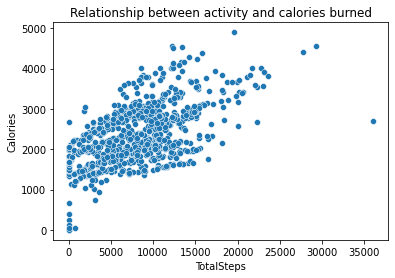

In [43]:

sns.scatterplot(x=activity_data['TotalSteps'],y=activity_data['Calories'])
plt.title("Relationship between activity and calories burned")

In [44]:
activity_data.head()

,Id,ActivityDate,Daysoftheweek,TotalSteps,Calories,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,TotalActiveMinutes,SedentaryMinutes,TotalMinutes,Activehours,Sedentaryhours,Totalhours
0,1503960366,2016-04-12,Tuesday,13162,1985,8.50,1.88,0.55,6.06,0.0,25,13,328,366,728,1094,6,12,18
1,1503960366,2016-04-13,Wednesday,10735,1797,6.97,1.57,0.69,4.71,0.0,21,19,217,257,776,1033,4,12,17
2,1503960366,2016-04-14,Thursday,10460,1776,6.74,2.44,0.40,3.91,0.0,30,11,181,222,1218,1440,3,20,24
3,1503960366,2016-04-15,Friday,9762,1745,6.28,2.14,1.26,2.83,0.0,29,34,209,272,726,998,4,12,16
4,1503960366,2016-04-16,Saturday,12669,1863,8.16,2.71,0.41,5.04,0.0,36,10,221,267,773,1040,4,12,17


Text(0.5, 1.0, 'barchart showing the most active days of the week')

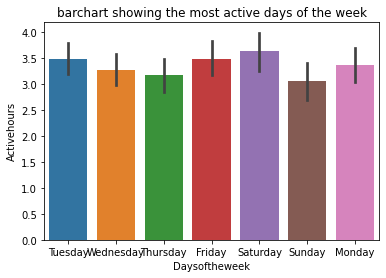

In [45]:

sns.barplot(x="Daysoftheweek",y="Activehours", data = activity_data)
plt.title("barchart showing the most active days of the week")

Text(0.5, 0, 'Sedentary hours')

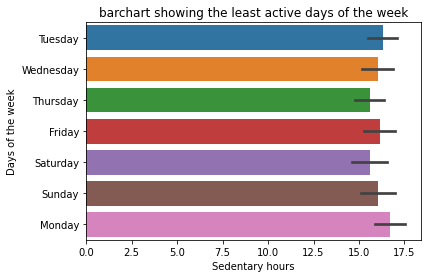

In [46]:

sns.barplot(x="Sedentaryhours",y="Daysoftheweek", data = activity_data)
plt.title("barchart showing the least active days of the week")
plt.ylabel("Days of the week")
plt.xlabel("Sedentary hours")

Text(0.5, 0, 'Number of hours asleep')

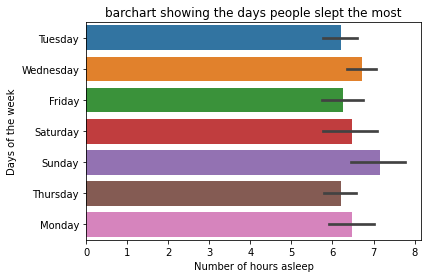

In [47]:

sns.barplot(x="Hoursasleep",y="Dayoftheweek", data = sleep_data)
plt.title("barchart showing the days people slept the most")
plt.ylabel("Days of the week")
plt.xlabel("Number of hours asleep")

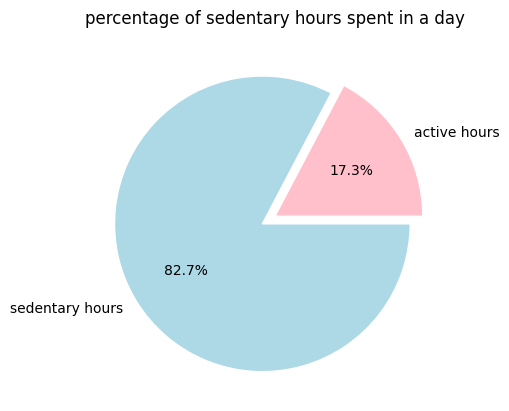

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [48]:
active_hours = activity_data['Activehours'].sum()
sedentary_hours = activity_data['Sedentaryhours'].sum()
slices = [active_hours,sedentary_hours]
labels = ['active hours','sedentary hours']
colours = ['pink','lightblue']
explode = [0,0.1]
plt.style.use ("default")
plt.pie(slices, labels = labels, colors = colours, wedgeprops = {"edgecolor" : "white"},explode = explode, autopct="%1.1f%%")
plt.title("percentage of sedentary hours spent in a day")
plt.show()
plt.figure(figsize=(8,6))

**Findings**

* I carried out a scatterplot analysis and it showed theres a postive correlation between total steps and calories 

i also carried out several barchart analysis and the following could be seen:
* people were most active on Saturdays compared to the other days of the week.
* It also showed that people were most sedentary on Mondays and tuesdays . 
* it also showed us that people slept the most on Sundays.
* Finally i conducted a piechart visualization which showed that most people lived a sedentary lifestyle by spending more than 80 percent of the day in a sedentary state.

**Recommendations**

After analyzing the two datasets. i have a few recommendations that i believe will improve the profit margin at the bellabeat company. i will be focusing on one product which will be the bellabeat app. i believe there should be a few changes made.

1. As we saw from the piechart analysis, a lot of women spend a large part of their day being sedentary, this is a very unhealthy lifestyle and i think we can improve our app by adding the sedentary notification feature which will alert our customers when they have been sitting or lying down for too long.

2. also in the statistical analysis, we could see the average number of steps to be 7600 less than the recommended steps. i think adding a lot diverse women friendly exercises on the app such as kegels or pilates to name a few will improve the app's traffic and increase the number of downloads on the app. This would encourage women to partake in these workouts and at the same time increase traffic which will in turn increase our profit.

3. Another observation i would like to make is, the women in this sample sleep for an average of 6 hours when the recommended is 8 hours. although we already have a sleep tracker on our app to track the sleep. its possible these women have a number of factors not allowing them to sleep properly. so i suggest we create an online community in our app where we post relatable topics such as relationships and pregnancy etc. this will enable these women interact on our app and we can see issues to solve even more clearly.


Thank you
